In [1]:
import cw07
import numpy as np
import pandas as pd

# Classwork 07

Jacob Anabi, Grady Lynch

10-09-2018

## Instructions

First, go through the slides indicated in the README and place any code fragments to test in the following subsection. Second, go through the rest of the notebook, execute lines to test them, and complete the coding assignments.

### Slide Scratch Work

#### Numpy Arrays Performance

In [2]:
%timeit l = range(100000)
%timeit lnp = np.arange(100000) # numpy performance (should be faster)

329 ns ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


92.6 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Numpy Universal Functions

In [3]:
%time x = np.linspace(-100,100,1000000) # numpy performance (should be faster)
D = 5.0
x0 = -3.5
%time g = (1.0/np.sqrt(2*np.pi*D))*np.exp(-(x - x0)**2/(2*D))

CPU times: user 10.4 ms, sys: 2.06 ms, total: 12.5 ms
Wall time: 10.9 ms
CPU times: user 32.7 ms, sys: 16 ms, total: 48.7 ms
Wall time: 49.8 ms


#### Numpy Vectorizing Functions

In [4]:
x = np.arange(1,100)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
def f(x):
    if x%2==0:
        return "Even"
    else:
        return "Odd"

fv = np.vectorize(f)
fv(x)

array(['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd',
       'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
       'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd',
       'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
       'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd',
       'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
       'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd',
       'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
       'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd',
       'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
       'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd'],
      dtype='<U4')

#### Array Views

In [6]:
l = np.arange(20)
l

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [7]:
l_3d = np.reshape(l, (2,2,5))
l_3d

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [8]:
l_3d[1,1,4]

19

In [9]:
l[0:4] = 999
l_3d[1,1,2:] = -1

In [10]:
l_3d

array([[[999, 999, 999, 999,   4],
        [  5,   6,   7,   8,   9]],

       [[ 10,  11,  12,  13,  14],
        [ 15,  16,  -1,  -1,  -1]]])

## Description

The following code benchmarks and plots functions approximated both as python lists and as numpy arrays.

### Module Documentation

For illustration, here is a reminder of how the python help system naturally uses the docstrings from the code.

In [11]:
help(cw07)

Help on module cw07:

NAME
    cw07

DESCRIPTION
    Classwork 07
    This classwork introduces numpy arrays and compares their performance to
    python lists.

FUNCTIONS
    gen_gaussian_array(a, b, n=1000)
        gen_gaussian_array(a, b, n=1000)
        Generate a discrete approximation of a Gaussian function, including its
        domain and range, stored as a pair of numpy arrays.
        
        Args:
            a (float) : Lower bound of domain
            b (float) : Upper bound of domain
            n (int, optional) : Number of points in domain, defaults to 1000.
        
        Returns:
            (x, g) : Pair of numpy arrays of float64
                x  : [a, ..., b] Array of n equally spaced float64 between a and b
                g  : [g(a), ..., g(b)] Array of Gaussian values matched to x
    
    gen_gaussian_list(a, b, n=1000)
        gen_gaussian_list(a, b, n=1000)
        Generate a discrete approximation of a Gaussian function, including its
        domain an

In [12]:
help(cw07.gen_gaussian_list)

Help on function gen_gaussian_list in module cw07:

gen_gaussian_list(a, b, n=1000)
    gen_gaussian_list(a, b, n=1000)
    Generate a discrete approximation of a Gaussian function, including its
    domain and range, stored as a pair of vanilla python lists.
    
    Args:
        a (float) : Lower bound of domain
        b (float) : Upper bound of domain
        n (int, optional) : Number of points in domain, defaults to 1000.
    
    Returns:
        (x, g) : Pair of lists of floats
            x  : [a, ..., b] List of n equally spaced floats between a and b
            g  : [g(a), ..., g(b)] List of Gaussian values matched to x



In [13]:
?cw07.gen_gaussian_array

Signature: cw07.gen_gaussian_array(a, b, n=1000)
Docstring:
gen_gaussian_array(a, b, n=1000)
Generate a discrete approximation of a Gaussian function, including its
domain and range, stored as a pair of numpy arrays.

Args:
    a (float) : Lower bound of domain
    b (float) : Upper bound of domain
    n (int, optional) : Number of points in domain, defaults to 1000.

Returns:
    (x, g) : Pair of numpy arrays of float64
        x  : [a, ..., b] Array of n equally spaced float64 between a and b
        g  : [g(a), ..., g(b)] Array of Gaussian values matched to x
File:      ~/PHYS220/cw07-another-team-name/cw07.py
Type:      function


### Python Lists

Benchmark and plot the reference list implementation.

#### Gaussian Function

In [14]:
%time x, g = cw07.gen_gaussian_list(-10,10,1000001)

CPU times: user 831 ms, sys: 52 ms, total: 883 ms
Wall time: 881 ms


In [15]:
gauss = pd.DataFrame({"x":x,"g(x)":g})

In [16]:
gauss

,x,g(x)
0,-10.00000,7.694599e-23
1,-9.99998,7.696138e-23
2,-9.99996,7.697677e-23
3,-9.99994,7.699217e-23
4,-9.99992,7.700757e-23
5,-9.99990,7.702297e-23
6,-9.99988,7.703838e-23
7,-9.99986,7.705379e-23
8,-9.99984,7.706920e-23
9,-9.99982,7.708461e-23


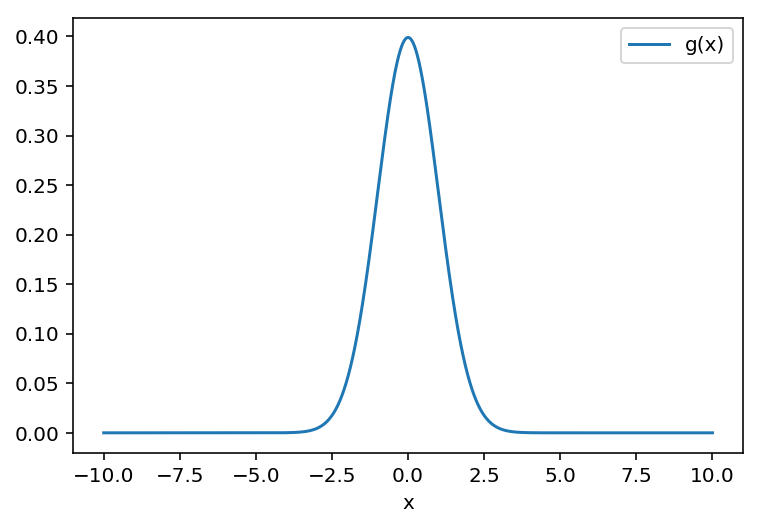

In [17]:
gauss.plot(x="x",y="g(x)")

Sinc Function

In [18]:
%time x, g = cw07.gen_sinc_list(-10,10,1000001)

CPU times: user 573 ms, sys: 64.1 ms, total: 637 ms
Wall time: 634 ms


In [19]:
sinc = pd.DataFrame({"x":x,"g(x)":g})

In [20]:
sinc

,x,g(x)
0,-10.00000,-0.054402
1,-9.99998,-0.054401
2,-9.99996,-0.054399
3,-9.99994,-0.054397
4,-9.99992,-0.054396
5,-9.99990,-0.054394
6,-9.99988,-0.054393
7,-9.99986,-0.054391
8,-9.99984,-0.054390
9,-9.99982,-0.054388


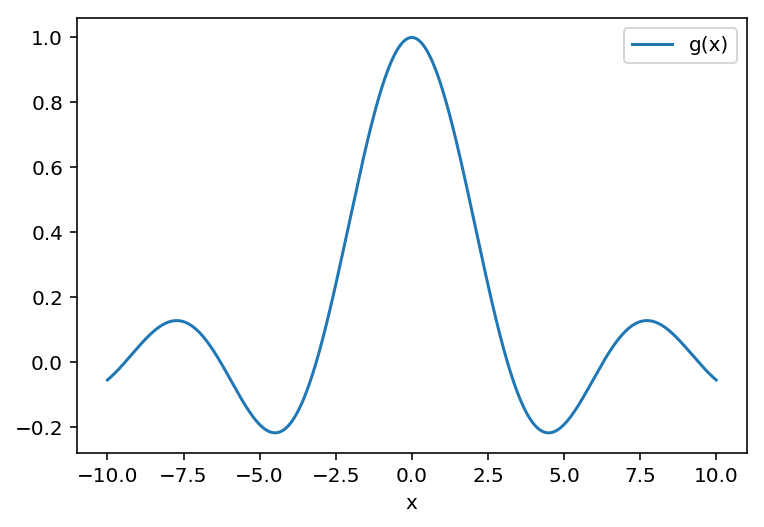

In [21]:
sinc.plot(x="x",y="g(x)")

### Numpy Arrays

#### Gaussian Function

In [22]:
%time x, g = cw07.gen_gaussian_array(-10, 10, 1000001)

CPU times: user 59 ms, sys: 12.4 ms, total: 71.4 ms
Wall time: 68.3 ms


In [23]:
gauss = pd.DataFrame({"x":x,"g(x)":g})

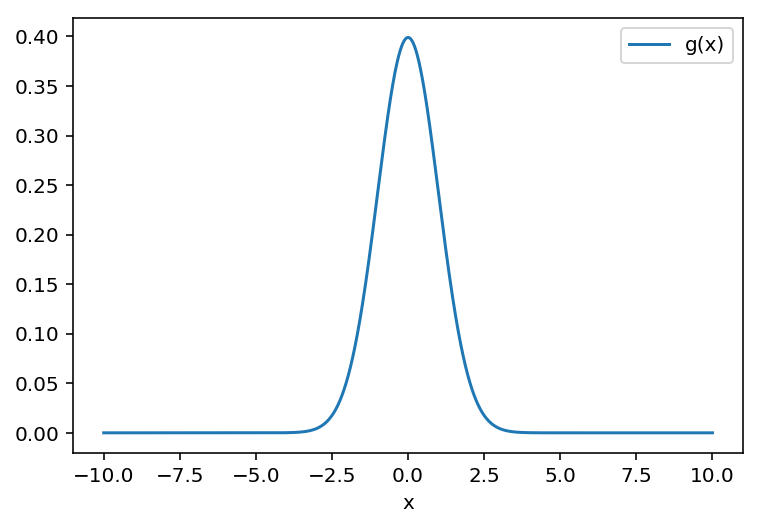

In [24]:
gauss.plot(x="x",y="g(x)")

Sinc Function

In [25]:
%time x, g = cw07.gen_sinc_array(-10,10,1000001)

CPU times: user 35.4 ms, sys: 8.54 ms, total: 44 ms
Wall time: 39.4 ms


In [26]:
sinc = pd.DataFrame({"x":x,"g(x)":g})

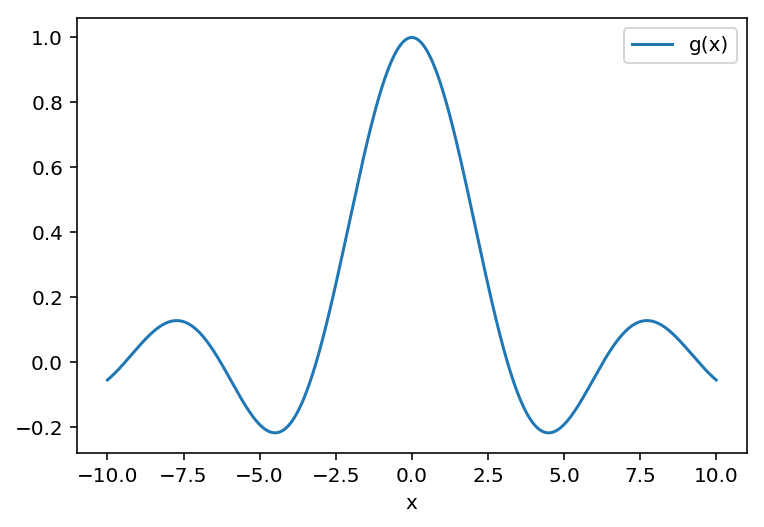

In [27]:
sinc.plot(x="x",y="g(x)")

## Conclusions

Place your conclusion about your investigations at the end in a well-written conclusion section.